In [1]:
import os
import sys
AbsPath = str(os.path.abspath(""))+"/../.."
sys.path.append(AbsPath)
import importlib
import pickle
import numpy as np
import matplotlib as mpl
import colossus.halo.mass_adv as massdefs
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
from copy import copy
from itertools import cycle
from matplotlib import cm
ColourMap = cm.RdBu
from Functions import Functions as F
from Scripts.Plots import SDSS_Plots
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting the SDSS plots
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo =cosmology.getCurrent()
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1, Args are (Mass, Redshift)
h = Cosmo.h
h_3 = h*h*h

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/data/pg1g15/STEEL/Notebooks/Plots/../../Scripts/Plots/SDSS_Plots.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

FRACKSKY= 0.1404020420493216


In [12]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size']=22
plt.rcParams['lines.linewidth']=5

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


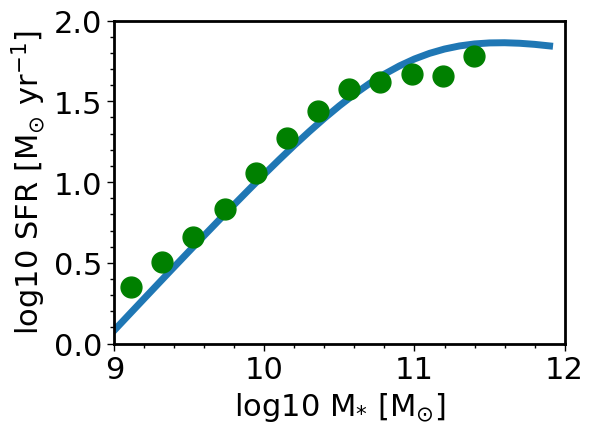

In [3]:
L2=np.loadtxt(AbsPath+"/Data/Observational/Leja_SFR/z2.dat", skiprows = 1)
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.33*z - 0.08*(z**2))
    Norm = 0.69 + 0.71*z - 0.088*(z**2)
    Alpha = 1.0 - 0.022*z + 0.009*(z**2)
    Beta = 1.8 - 1.0*z + 0.1*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)
M = np.arange(7, 12, 0.1)
plt.plot(M, G19_SFR_DPL(M, 2.0), "-", color = "C0")

#Leja
plt.plot(L2[:,0], np.log10(L2[:,1]), "og", markersize = 15)

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(9, 12)
plt.ylim(-0.0, 2)
plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Paper2/SFR_Cartoon.png")
plt.show()
plt.clf()

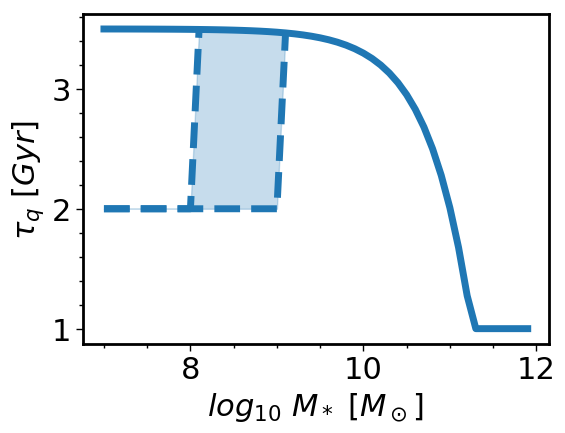

In [13]:
SF_Q_Options = [1,2,3]
z_infall = 0.5
SM_Sat = np.arange(7, 12, 0.1)
for SF_Q in SF_Q_Options:
    #Moster17
    if np.any(SF_Q == np.array([1])):
        Tdyn = F.DynamicalTime_Fun(z_infall)
        Tau_d = Tdyn*4.282*np.power(10, -0.363*(SM_Sat - 10))
        Tau_d[Tau_d < Tdyn*4.282] = Tdyn*4.282
        Tau_f = np.full_like(SM_Sat, 0.5)
        #plt.plot(SM_Sat, Tau_d, "M")
        #print("Moster", Factor_Stripping_SF, Paramaters['SF_Q'])
    elif np.any(SF_Q == np.array([2])): #Wetzel 13
        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0
        plt.plot(SM_Sat, Tau_d, "C0")
    elif np.any(SF_Q == np.array([3])): #Fillingham 16 #Host Dep

        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0   
        Tau_d_10 = copy(Tau_d)
        Tau_d_15 = copy(Tau_d)
        Host_Dep = (10-15)/5
        Tau_d_10[SM_Sat < 9+Host_Dep] = 2.0 #Tau_d[np.digitize(9, SM_Sat)] + 1.25*(SM_Sat[SM_Sat < 9] - (10-Correction))
        plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_10[:np.digitize(9+Host_Dep, SM_Sat)+1], "C0--")
        Host_Dep = (15 - 15)/5
        Tau_d_15[SM_Sat < 9+Host_Dep] = 2.0
        Tau_d[Tau_d < 1.0] = 1.0
        plt.fill_between(SM_Sat, Tau_d_10, Tau_d_15, interpolate = True, color = "C0", alpha = 0.25)
        
        plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_15[:np.digitize(9+Host_Dep, SM_Sat)+1], "C0--")
    else:
        Tau = np.full_like(SM_Sat, 3.0) #Quenchtime is always X gyr
        Tau_f = np.full_like(SM_Sat, 0.5)
        #T_quench = np.full_like(SM_Sat,-1) #so it never triggers
plt.ylabel(r"$\tau_{q}$ $[Gyr]$")
plt.xlabel("$log_{10}$ $M_*$ $[M_\odot]$")
plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Hawking/Quenchtime.png")
plt.show()

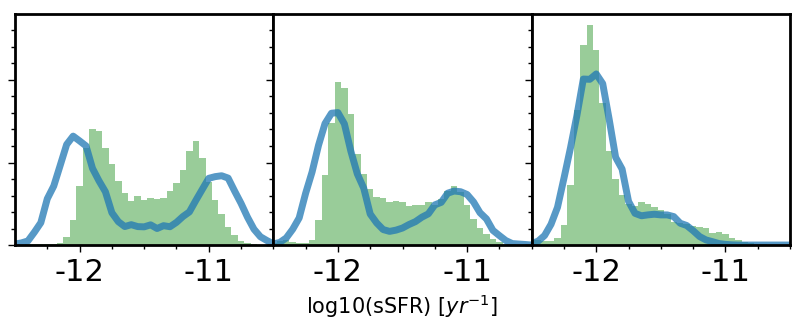

In [14]:
Tdyn_Factors = [('1.0', True, True, True, 'G19_DPL', 'G19_SE')]
f, SubPlots = plt.subplots(1, 3, figsize = (10,3), sharey = True)
FirstPass = True
No_Leg = False
lines = ["--", "-.", "-","-", "--","-."]
colours = ["C3", "C0", "C1", "C2", "C5", "k"]
linecycler = cycle(lines)
colourcycler = cycle(colours)
x,y=0,0
for i, Factor in enumerate(Tdyn_Factors): 
    Line = "-"
    Colour = "C0"
    Surviving_Sat_SMF_MassRange, sSFR_Range, Satellite_sSFR = F.LoadData_sSFR(Factor)
    bin_w = Surviving_Sat_SMF_MassRange[1]-Surviving_Sat_SMF_MassRange[0]
    x = 0
    for l,u in [(10,10.5),(10.5,11),(11,12)]:
        Weights = np.sum(Satellite_sSFR[np.digitize(l, bins = Surviving_Sat_SMF_MassRange):np.digitize(u, bins = Surviving_Sat_SMF_MassRange)], axis = 0)
        N_Ntot = Weights/(np.sum(Weights)*bin_w)
        #SubPlots[x].set_title("{}-{}".format(l,u) + "$M_{*, sat}$")
        if FirstPass == True:    
            if i == 0 and x == 2:
                No_Leg = False
            else:
                No_Leg = True
            A = Add_SDSS.sSFR_Plot(l, u, SubPlots[x], No_Leg = No_Leg, colour = "g")
        if x==2:
            if Tdyn_Factors[i][2]:
                Label = "{}, W13+F16".format(Tdyn_Factors[i][4])

            else:
                Label = "{}".format(Tdyn_Factors[i])
            SubPlots[x].plot(sSFR_Range, N_Ntot, Line, color = Colour,label = Label, alpha = 0.75)
        else:
            SubPlots[x].plot(sSFR_Range, N_Ntot, Line, color = Colour,alpha = 0.75)
        x +=1
    FirstPass = False

SubPlots[0].set_xlim(-13, -9.0)
SubPlots[1].set_xlim(SubPlots[0].get_xlim())
SubPlots[2].set_xlim(SubPlots[0].get_xlim())
#mpl.rcParams.update({'font.size': 11})
#SubPlots[2].legend(loc = 1, frameon = False)
#mpl.rcParams.update({'font.size': 11})

SubPlots[1].set_xlabel("log10(sSFR) [$yr^{-1}$]", fontproperties = mpl.font_manager.FontProperties(size = 15))
#print(ax.get_xticks())  
SubPlots[0].set_xticklabels(["-13", "-12", "-11", "-10", ""])
SubPlots[1].set_xticklabels(["-13", "-12", "-11", "-10", ""])
SubPlots[2].set_xticklabels(["-13", "-12", "-11", "-10", "-9"])

SubPlots[0].set_yticklabels([])
#when you come looking for how to do this
#ticks = plt.xticks(); plt.xticks(ticks[:-1])


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(AbsPath+"/Figures/Hawking/sSFR.png")
plt.show()